## Notebook to explore downloaded metadata from Mapillary

#### Load Libraries

In [1]:
from pathlib import Path
from environs import Env
import contextily

In [2]:
from streetscapes.sources import Mapillary
from streetscapes.streetview import SVWorkspace

#### Initiate environment and city to analyse

In [3]:
env = Env()
env.read_env(".env")
city = "Amsterdam"

In [4]:
hf_path = Path(env.path("HF_HOME"), city)
ws = SVWorkspace(hf_path)
mp = Mapillary(ws.env, root_dir=hf_path)
mp

Mapillary(root_dir='~/Documents/Urban-M4/data/Amsterdam')

#### Convert json files to geopandas dataframes

In [5]:
# Images by bounding box that we have downloaded metadata for

bbox_gdf = mp.concat_metadata(f"{hf_path}/metadata/Amsterdam_*.json")
bbox_gdf

,id,altitude,atomic_scale,camera_type,captured_at,compass_angle,computed_altitude,computed_compass_angle,computed_rotation,exif_orientation,...,thumb_original_url,sequence,width,computed_geometry.type,computed_geometry.coordinates,geometry.type,geometry.coordinates,lon,lat,geometry
0,2776215189347670,0.000000,1.008402,perspective,1646667930033,104.000000,1.105678,242.464404,"[0.94374062206517, 1.5726851053461, -1.5355993...",1,...,https://scontent-muc2-1.xx.fbcdn.net/m1/v/t6/A...,HmLZWQzRuc25X1G9fwl0Sx,4032,Point,"[4.9521600242941, 52.282648825481]",Point,"[4.9521299435028, 52.282569900002]",4.952130,52.282570,POINT (4.95213 52.28257)
1,2146724175703001,-4.862300,0.961824,perspective,1718104172071,160.500617,-4.209696,340.376632,"[1.2883731820311, 0.22527548845366, -0.2893114...",1,...,https://scontent-muc2-1.xx.fbcdn.net/m1/v/t6/A...,kKXEFrxy8jQ4Y7aUR5poSI,1920,Point,"[4.95772762733, 52.272783649589]",Point,"[4.9577551213, 52.27276471]",4.957755,52.272765,POINT (4.95776 52.27276)
2,2148331585601396,20.030000,0.951903,perspective,1741610687620,106.040000,-4.041915,288.258222,"[1.2396543010692, 0.8921200781791, -1.01977091...",1,...,https://scontent-muc2-1.xx.fbcdn.net/m1/v/t6/A...,Ot2CDoYZmur7JlW1HIvQ6f,1920,Point,"[4.9124652201651, 52.288526734728]",Point,"[4.9120578, 52.2884851]",4.912058,52.288485,POINT (4.91206 52.28849)
3,2146245569171832,-0.790000,0.712223,perspective,1747217573460,101.420000,-0.490748,113.844182,"[0.85057624268992, -1.3234876323701, 1.6188333...",1,...,https://scontent-muc2-1.xx.fbcdn.net/m1/v/t6/A...,5b9ZUslJHtB6NRxeMruKSc,3840,Point,"[4.9230786916648, 52.286793815974]",Point,"[4.9231756, 52.2867916]",4.923176,52.286792,POINT (4.92318 52.28679)
4,2678400032350697,-5.320000,1.072537,perspective,1747217668720,267.930000,-4.631204,273.666489,"[0.99783791063445, 1.0152997876732, -1.1984024...",1,...,https://scontent-muc2-1.xx.fbcdn.net/m1/v/t6/A...,BOiV5qK6gzREIyDp8m0kw9,3840,Point,"[4.951436682586, 52.28431977657]",Point,"[4.951359, 52.2843085]",4.951359,52.284309,POINT (4.95136 52.28431)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9853661694749052,0.000000,1.021182,perspective,1746523243086,59.981490,-1.667687,62.220755,"[1.3210724747299, -0.80088358334921, 0.8690864...",1,...,https://scontent-muc2-1.xx.fbcdn.net/m1/v/t6/A...,7U6kfNS0EPxwqnQ5orFXML,4032,Point,"[4.8593349347406, 52.285188989537]",Point,"[4.859389245178, 52.285204498726]",4.859389,52.285204,POINT (4.85939 52.2852)
96,5628687400537488,41.273059,0.999877,equirectangular,1474360864303,0.000000,1.979814,359.957459,"[1.5711230288642, 0.0010561489030971, -0.00011...",1,...,https://scontent-muc2-1.xx.fbcdn.net/m1/v/t6/A...,q3lm-2hZjLWCJACjhN2leA,8000,Point,"[4.8296497695495, 52.283937002615]",Point,"[4.8296497752344, 52.283936946689]",4.829650,52.283937,POINT (4.82965 52.28394)
97,2361714777545192,18.390000,0.989456,perspective,1747224355150,108.020000,1.655518,286.758371,"[1.2424371425654, 0.92356289911497, -1.0308549...",1,...,https://scontent-muc2-1.xx.fbcdn.net/m1/v/t6/A...,VQLigtbBIk1WPshdAowcTJ,2704,Point,"[4.8573854994767, 52.300552184707]",Point,"[4.8573828, 52.3005606]",4.857383,52.300561,POINT (4.85738 52.30056)
98,6887594808014433,0.000000,0.974339,perspective,1703334411475,72.377039,-2.833422,265.553931,"[-0.72448667395968, 0.74306516648027, 1.274471...",1,...,https://scontent-muc2-1.xx.fbcdn.net/m1/v/t6/A...,fZOBgVF1rQsRANhx8qLCY2,4000,Point,"[4.8166981739203, 52.282526008551]",Point,"[4.8163551000012, 52.282490300001]",4.816355,52.282490,POINT (4.81636 52.28249)


#### Plot location of images

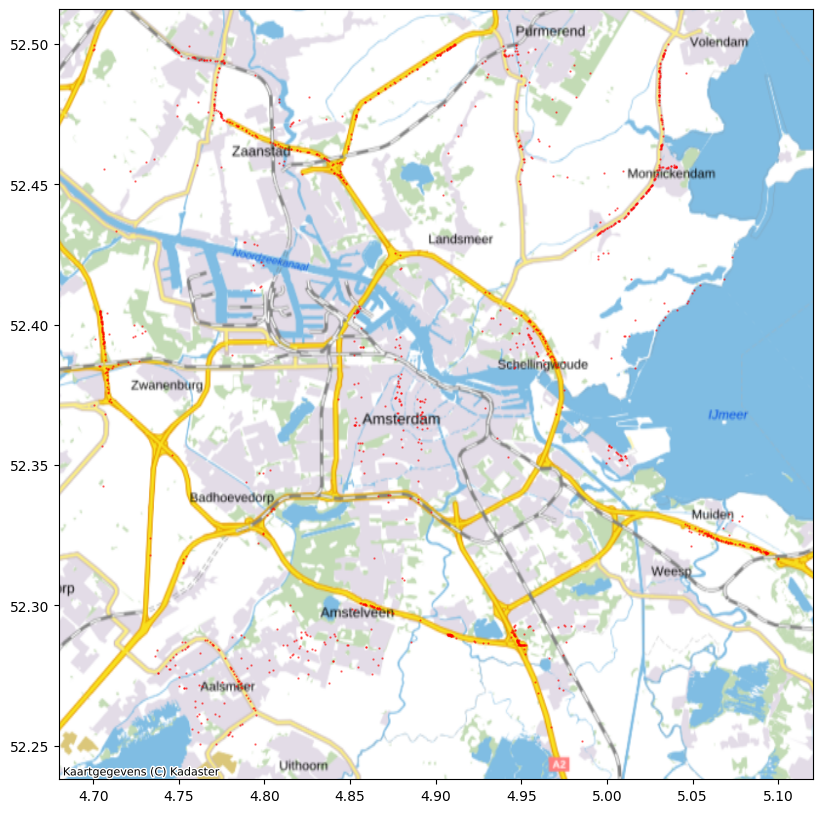

In [6]:
ax = bbox_gdf.plot(color="red", markersize=0.5, figsize=(10, 10), alpha=0.5)
contextily.add_basemap(
    ax, crs=bbox_gdf.crs, source=contextily.providers.nlmaps.standaard
)

##### Images by bounding box

##### Images by creator username

In this case 'amsterdam'

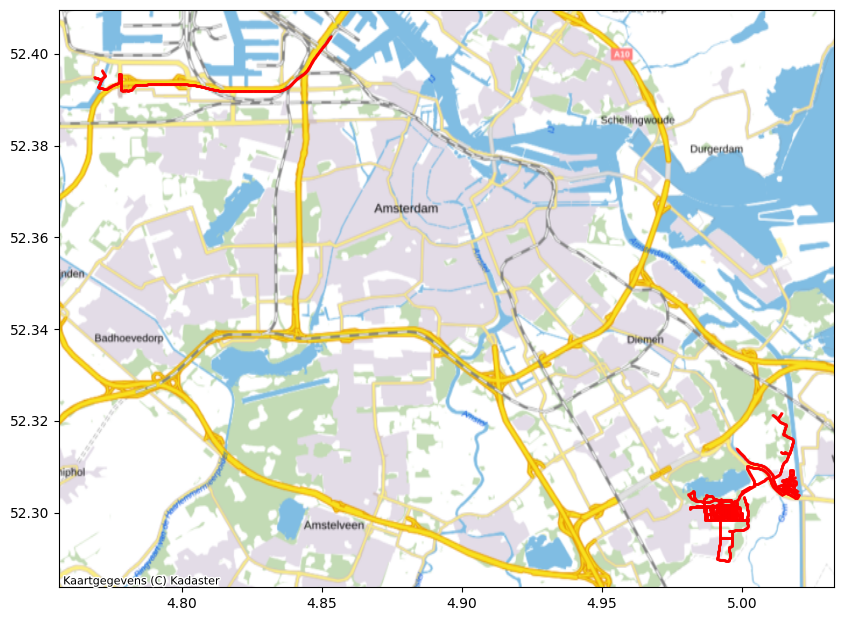

In [8]:
# Images by creator username that we have downloaded metadata for

creator_gdf = mp.concat_metadata(f"{hf_path}/metadata/amsterdam*.json")
ax = creator_gdf.plot(color="red", markersize=0.5, figsize=(10, 10), alpha=0.5)
contextily.add_basemap(
    ax, crs=creator_gdf.crs, source=contextily.providers.nlmaps.standaard
)